In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [10]:
X = np.array([
    [-1, -1],
    [-2, -1],
    [-1, -2],
    [0, 0],
    [2, 1],
    [2, 3]])

In [11]:
X[0]

array([-1, -1])

In [8]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[0 0 0 0 1 1]


In [29]:
kmeans = KMeans(n_clusters=2, init= np.array([X[0], X[3]])).fit(X)

#cluster_centers = [X[0],X[3]]

kmeans.labels_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([0, 0, 0, 1, 1, 1])

In [89]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 0, 1, 1], dtype=int64)

In [32]:
silhouette_score(X, kmeans.labels_)

0.45993283428643883

In [93]:
from sklearn.decomposition import PCA

p = PCA(1)
p.fit(X)


PCA(n_components=1)

In [49]:
p.components_

array([[0.67944959, 0.73372219]])

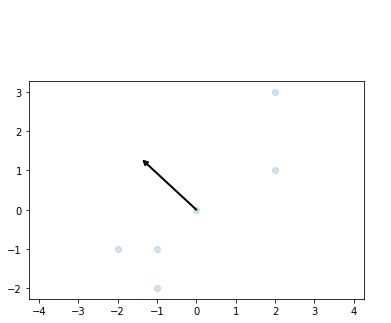

In [91]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(p.explained_variance_, p.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(p.mean_, p.mean_ + v)
plt.axis('equal');

In [59]:
X_pca = p.transform(X)

In [86]:
X_pca[5]

array([3.56006575])

In [87]:
from sklearn.manifold import MDS
mds = MDS( n_components=1, max_iter=300)
Xm = mds.fit_transform(X)

In [88]:
Xm

array([[ 1.33662747],
       [ 2.46321196],
       [ 1.9825745 ],
       [-0.00745504],
       [-2.09273265],
       [-3.68222624]])